## CRISP-DM Process 

1. Business Understanding
    
2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

# I- Business understanding

Who can host on Airbnb?
Behind every stay is a host, a real person who can give you the details you need to check in and feel at home. They can interact with guests in different ways, depending on the type of place or experience they booked
lmost anyone can be a host. It's free to sign up and list both stays and experiences. Whether they’re hosting a place to stay or a local activity, all hosts are expected to meet our quality standards every time
(<a href=" https://www.airbnb.com/help/article/18/who-can-host-on-airbnb#:~:text=Behind%20every%20stay%20is%20a,place%20or%20experience%20they%20booked.&text=It's%20free%20to%20sign%20up%20and%20list%20both%20stays%20and%20experiences.">link</a>)

### so we try to figure out the below issues <br>
a. the vairance of  price across specific period which data set include  after removing some outlier <br>
b. also trying to make scheme for correlation between parameters <br>
c. making a trail to analysis the text and comments of customer to know little bit about what customer need to know <br> 
d. predict the price of unit based on two model and evalute our models  

## I.I question neeed to ansewrs  <br>
what the most major price  reange required ? <br>
what is the factors affect the price ? <br>
what are the comments  of the guest they would to say ?<br> 
what the factors affects the price ? <br>

In [522]:
#importing Labiraires 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from wordcloud import WordCloud 

In [523]:
#reading file 
calendar = pd.read_csv ('calendar.csv')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [524]:
calendar['date'] = pd.to_datetime(calendar['date']).dt.normalize()

In [525]:
calendar['listing_id'] = calendar['listing_id'].astype(str)

In [526]:
calendar['price'] = calendar['price'].replace({'\$':''}, regex = True)

In [527]:
calendar.price.notnull().value_counts()

False    665853
True     643037
Name: price, dtype: int64

In [528]:
calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [529]:
calendar.dropna(subset = ['price'] , inplace= True )

In [530]:
calendar['price'] = pd.to_numeric(calendar['price'],errors='coerce')

In [531]:
calendar.head(20)

listing_id       date available  price
365    3075044 2017-08-22         t   65.0
366    3075044 2017-08-21         t   65.0
367    3075044 2017-08-20         t   65.0
368    3075044 2017-08-19         t   75.0
369    3075044 2017-08-18         t   75.0
370    3075044 2017-08-17         t   65.0
371    3075044 2017-08-16         t   65.0
372    3075044 2017-08-15         t   65.0
373    3075044 2017-08-14         t   65.0
374    3075044 2017-08-13         t   65.0
375    3075044 2017-08-12         t   75.0
376    3075044 2017-08-11         t   75.0
377    3075044 2017-08-10         t   65.0
378    3075044 2017-08-09         t   65.0
379    3075044 2017-08-08         t   65.0
380    3075044 2017-08-07         t   65.0
381    3075044 2017-08-06         t   65.0
382    3075044 2017-08-05         t   75.0
383    3075044 2017-08-04         t   75.0
384    3075044 2017-08-03         t   65.0

In [532]:
calendar.date.max () ,  calendar.date.min()  

(Timestamp('2017-09-05 00:00:00'), Timestamp('2016-09-06 00:00:00'))

In [533]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  object        
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  object        
 3   price       640469 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 24.5+ MB


In [534]:
calendar['quarter'] = pd.PeriodIndex(calendar.date, freq='Q')

In [535]:
calendar['month'] = pd.PeriodIndex(calendar.date, freq='m')

<AxesSubplot:xlabel='month', ylabel='price'>

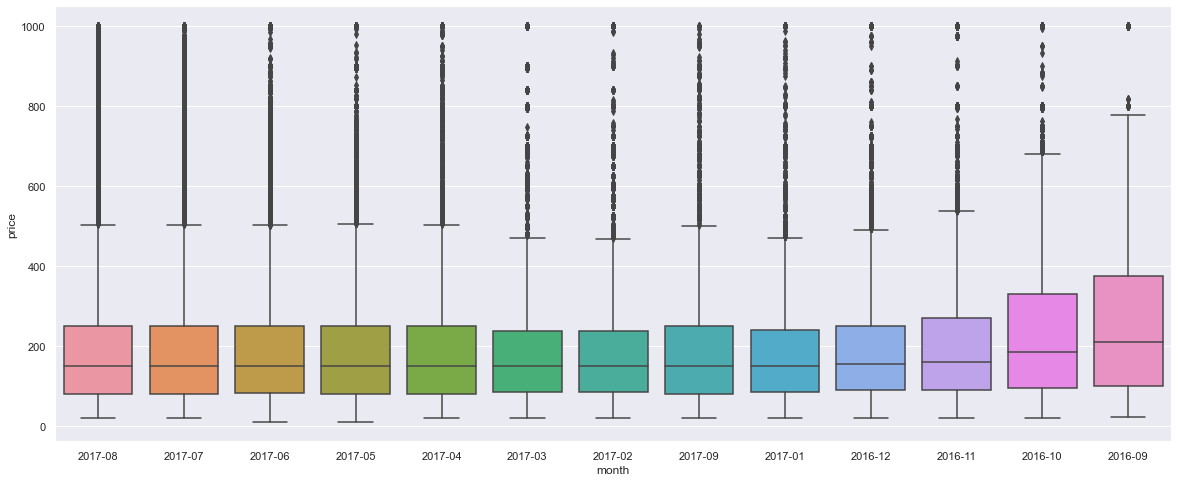

In [536]:
plt.rcParams["figure.figsize"] = (20,8)
sns.boxplot( data = calendar  , x='month',  y = 'price' )

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'disrtibution of price over time')

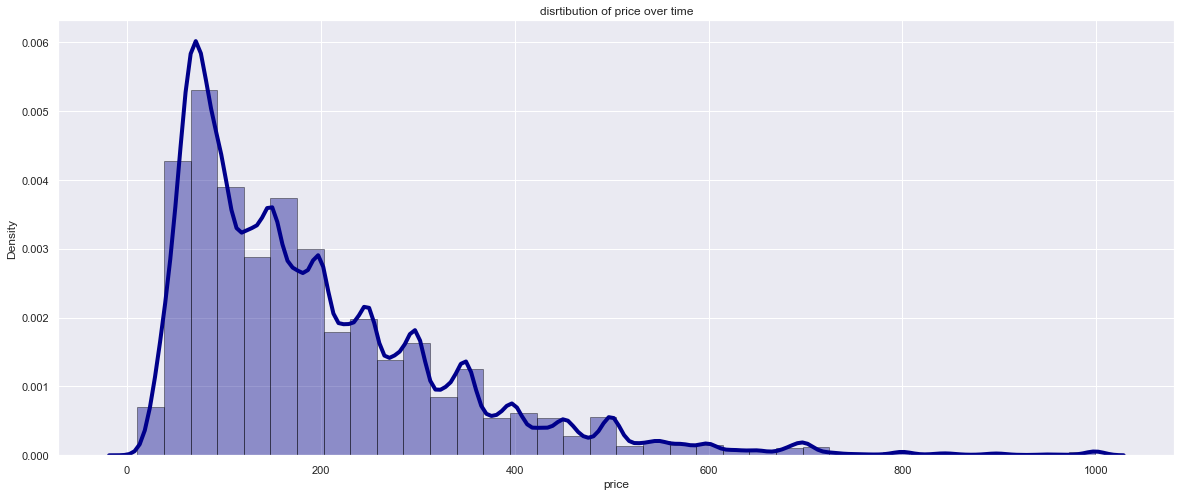

In [537]:
plt.rcParams["figure.figsize"] = (20,8)
sns.distplot(calendar['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title ('disrtibution of price over time')


### Rigth skewed 

### Removing Outlier 

In [538]:
calendar.describe().price

count    640469.00000
mean        192.45391
std         140.55155
min          11.00000
25%          85.00000
50%         150.00000
75%         250.00000
max         999.00000
Name: price, dtype: float64

### price of major unit lies between 20 to 500 and others is outliers 

In [539]:
calendar_new = calendar[(calendar['price'] >20) & (calendar['price'] <500)]
calendar_new.head()

listing_id       date available  price quarter    month
365    3075044 2017-08-22         t   65.0  2017Q3  2017-08
366    3075044 2017-08-21         t   65.0  2017Q3  2017-08
367    3075044 2017-08-20         t   65.0  2017Q3  2017-08
368    3075044 2017-08-19         t   75.0  2017Q3  2017-08
369    3075044 2017-08-18         t   75.0  2017Q3  2017-08

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'disrtibution of price over time')

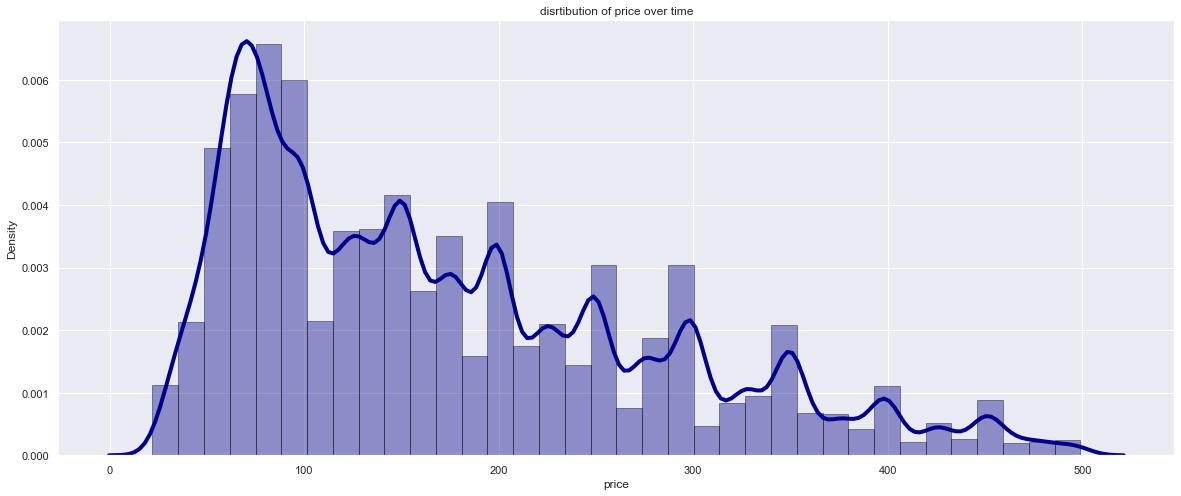

In [540]:
plt.rcParams["figure.figsize"] = (20,8)
sns.distplot(calendar_new['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title ('disrtibution of price over time')

#### After Removing Of Outlier 
above histogram of price show tendancy to right skewed means 
the higher price mean less hosting times and hosting increase by the less of price 

<AxesSubplot:xlabel='month', ylabel='price'>

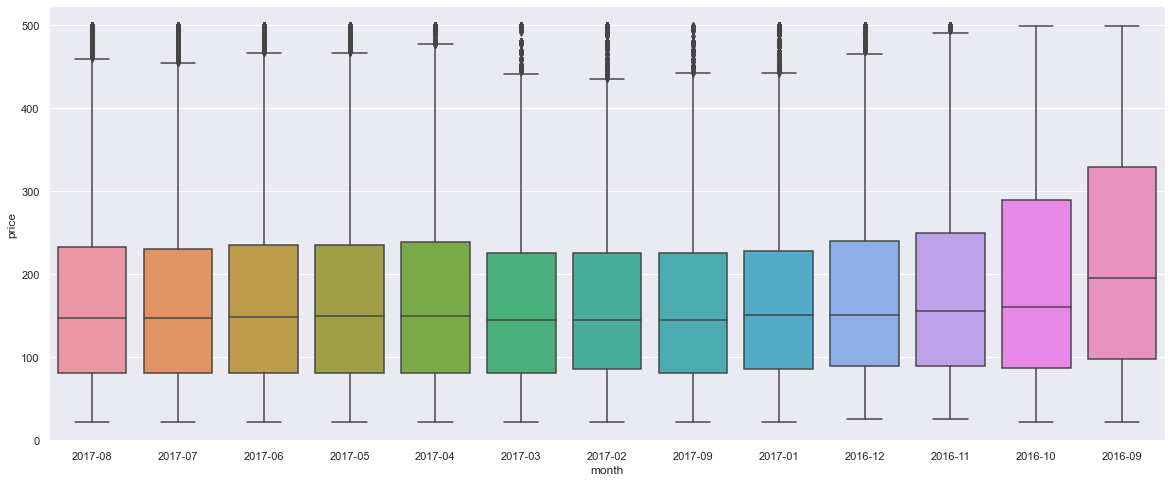

In [541]:
plt.rcParams["figure.figsize"] = (20,8)
sns.boxplot( data = calendar_new  , x='month',  y = 'price' )

### Listings 
=============================================================

In [542]:
listings = pd.read_csv ('listings.csv')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [543]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [544]:
listings.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [545]:
listings['price']  = listings['price'].str.replace(',', '')
listings['price']  = listings['price'].str.replace('$', '')
listings['price'] = pd.to_numeric(listings['price'])

In [546]:
listings['last_scraped'] = pd.to_datetime(listings.last_scraped)

In [547]:
listings['cleaning_fee']  = listings['cleaning_fee'].str.replace(',', '')
listings['cleaning_fee']  = listings['cleaning_fee'].str.replace('$', '')
listings['cleaning_fee'] = pd.to_numeric(listings['cleaning_fee'])

In [548]:
drop_column = ['id','host_id', 'listing_url' , 'scrape_id','jurisdiction_names','neighbourhood_group_cleansed','has_availability','license','neighbourhood_cleansed','has_availability', 'square_feet',
             'thumbnail_url' , 'medium_url' , 'picture_url' 
             , 'xl_picture_url' , 'host_url', 'host_thumbnail_url', 'host_picture_url']

In [549]:
listings.drop(drop_column , axis = 1  , inplace = True )

In [550]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   last_scraped                      3585 non-null   datetime64[ns]
 1   name                              3585 non-null   object        
 2   summary                           3442 non-null   object        
 3   space                             2528 non-null   object        
 4   description                       3585 non-null   object        
 5   experiences_offered               3585 non-null   object        
 6   neighborhood_overview             2170 non-null   object        
 7   notes                             1610 non-null   object        
 8   transit                           2295 non-null   object        
 9   access                            2096 non-null   object        
 10  interaction                       2031 non-null 

In [551]:
listings.dropna(how = 'all')

last_scraped                                           name  \
0      2016-09-07                     Sunny Bungalow in the City   
1      2016-09-07              Charming room in pet friendly apt   
2      2016-09-07               Mexican Folk Art Haven in Boston   
3      2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      2016-09-07                            Come Home to Boston   
...           ...                                            ...   
3580   2016-09-07                           Big cozy room near T   
3581   2016-09-07            BU Apartment DexterPark Bright room   
3582   2016-09-07                       Gorgeous funky apartment   
3583   2016-09-07          Great Location; Train and Restaurants   
3584   2016-09-07             (K1) Private Room near Harvard/MIT   

                                                summary  \
0     Cozy, sunny, family home.  Master bedroom high...   
1     Charming and quiet room in a second floor 1910...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Come experience the comforts of home away from...   
4     My comfy, clean and relaxing home is one block...   
...                                                 ...   
3580  5 min walking to Orange Line subway with 2 sto...   
3581  Most popular apartment in BU, best located in ...   
3582  Funky little apartment close to public transpo...   
3583  My place is close to Taco Loco Mexican Grill, ...   
3584  My place is close to My home is a warm and fri...   

                                                  space  \
0     The house has an open and cozy feel at the sam...   
1     Small but cozy and quite room with a full size...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Most places you find in Boston are small howev...   
4     Clean, attractive, private room, one block fro...   
...                                                 ...   
3580                                                NaN   
3581                                Best location in BU   
3582  Modern and relaxed space with many facilities ...   
3583                                                NaN   
3584  To ensure a smooth check in: 1. You MUST have ...   

                                            description experiences_offered  \
0     Cozy, sunny, family home.  Master bedroom high...                none   
1     Charming and quiet room in a second floor 1910...                none   
2     Come stay with a friendly, middle-aged guy in ...                none   
3     Come experience the comforts of home away from...                none   
4     My comfy, clean and relaxing home is one block...                none   
...                                                 ...                 ...   
3580  5 min walking to Orange Line subway with 2 sto...                none   
3581  Most popular apartment in BU, best located in ...                none   
3582  Funky little apartment close to public transpo...                none   
3583  My place is close to Taco Loco Mexican Grill, ...                none   
3584  My place is close to My home is a warm and fri...                none   

                                  neighborhood_overview  \
0     Roslindale is quiet, convenient and friendly. ...   
1     The room is in Roslindale, a diverse and prima...   
2     The LOCATION: Roslindale is a safe and diverse...   
3     Roslindale is a lovely little neighborhood loc...   
4     I love the proximity to downtown, the neighbor...   
...                                                 ...   
3580                                                NaN   
3581                                                NaN   
3582  Cambridge is a short walk into Boston, and set...   
3583                                                NaN   
3584                                                NaN   

                                                  notes  \
0                                                   N

In [552]:
listings.shape

(3585, 78)

In [553]:
listings.property_type.dropna()

0           House
1       Apartment
2       Apartment
3           House
4           House
          ...    
3580    Apartment
3581    Apartment
3582    Apartment
3583    Apartment
3584    Apartment
Name: property_type, Length: 3582, dtype: object

In [554]:
# get categorical data 
listings_categorical =listings.select_dtypes(include=['object'])
listings_categorical.shape

(3585, 50)

In [555]:
# get numerical data 
listings_numerical = listings.select_dtypes(include=['int64','float'])
listings_numerical.head()

host_listings_count  host_total_listings_count   latitude  longitude  \
0                    1                          1  42.282619 -71.133068   
1                    1                          1  42.286241 -71.134374   
2                    1                          1  42.292438 -71.135765   
3                    1                          1  42.281106 -71.121021   
4                    1                          1  42.284512 -71.136258   

   accommodates  bathrooms  bedrooms  beds  price  cleaning_fee  ...  \
0             4        1.5       2.0   3.0  250.0          35.0  ...   
1             2        1.0       1.0   1.0   65.0          10.0  ...   
2             2        1.0       1.0   1.0   65.0           NaN  ...   
3             4        1.0       1.0   2.0   75.0          50.0  ...   
4             2        1.5       1.0   2.0   79.0          15.0  ...   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                  0                   NaN                     NaN   
1                 36                  94.0                    10.0   
2                 41                  98.0                    10.0   
3                  1                 100.0                    10.0   
4                 29                  99.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        NaN                    NaN   
1                        9.0                   10.0   
2                        9.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          NaN                     NaN                  NaN   
1                         10.0                     9.0                  9.0   
2                         10.0                     9.0                 10.0   
3                         10.0                    10.0                 10.0   
4                         10.0                     9.0                 10.0   

   calculated_host_listings_count  reviews_per_month  
0                               1                NaN  
1                               1               1.30  
2                               1               0.47  
3                               1               1.00  
4                               1               2.25  

[5 rows x 27 columns]

In [556]:
listings_numerical = listings_numerical.dropna(how = 'all')
listings_numerical.reset_index(inplace=True)
listings_numerical.head()

index  host_listings_count  host_total_listings_count   latitude  \
0      0                    1                          1  42.282619   
1      1                    1                          1  42.286241   
2      2                    1                          1  42.292438   
3      3                    1                          1  42.281106   
4      4                    1                          1  42.284512   

   longitude  accommodates  bathrooms  bedrooms  beds  price  ...  \
0 -71.133068             4        1.5       2.0   3.0  250.0  ...   
1 -71.134374             2        1.0       1.0   1.0   65.0  ...   
2 -71.135765             2        1.0       1.0   1.0   65.0  ...   
3 -71.121021             4        1.0       1.0   2.0   75.0  ...   
4 -71.136258             2        1.5       1.0   2.0   79.0  ...   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                  0                   NaN                     NaN   
1                 36                  94.0                    10.0   
2                 41                  98.0                    10.0   
3                  1                 100.0                    10.0   
4                 29                  99.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        NaN                    NaN   
1                        9.0                   10.0   
2                        9.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          NaN                     NaN                  NaN   
1                         10.0                     9.0                  9.0   
2                         10.0                     9.0                 10.0   
3                         10.0                    10.0                 10.0   
4                         10.0                     9.0                 10.0   

   calculated_host_listings_count  reviews_per_month  
0                               1                NaN  
1                               1               1.30  
2                               1               0.47  
3                               1               1.00  
4                               1               2.25  

[5 rows x 28 columns]

## studing the correlation between numerical parameters 

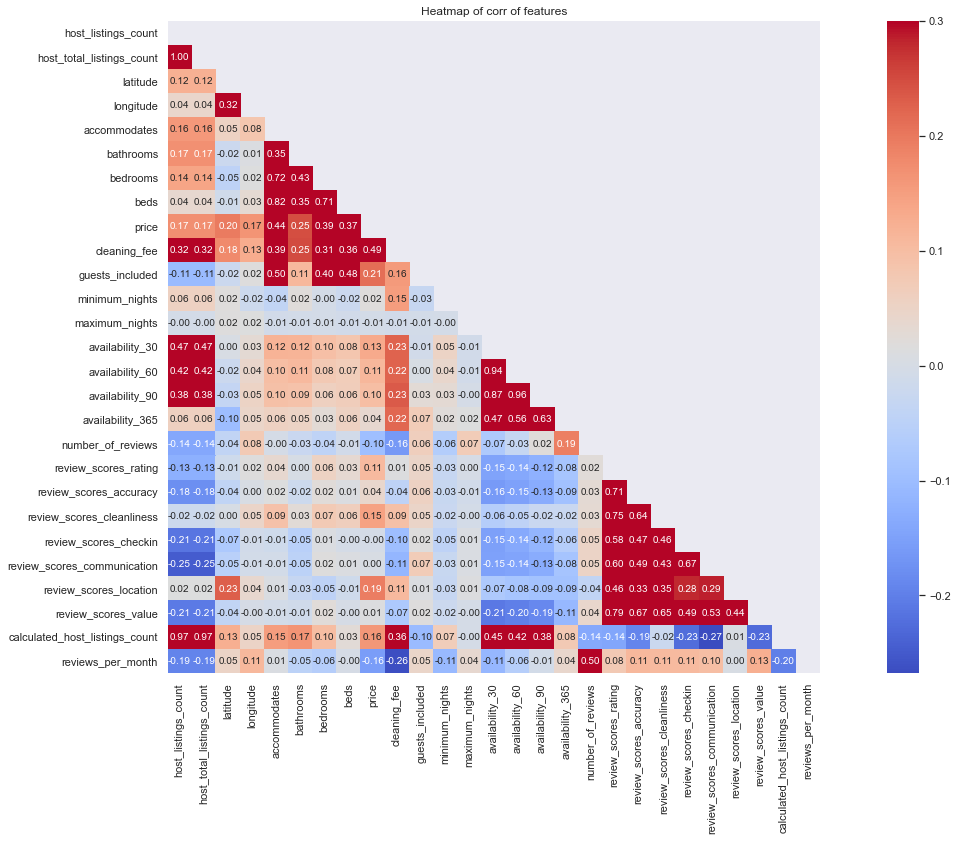

In [557]:
n_corr = listings.select_dtypes(include=['int64', 'float64']).corr()
mask = np.zeros_like(n_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,12))
plt.title('Heatmap of corr of features')
sns.heatmap(n_corr, mask = mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [558]:
import plotly.express as px
fig = px.scatter_matrix(listings , dimensions=["price", "bathrooms", "bathrooms", "cleaning_fee", "beds"] , color="room_type")
fig.show()

In [559]:
listings['last_scraped'] = listings['last_scraped'].dt.normalize()


In [560]:
listings['last_scraped']

0      2016-09-07
1      2016-09-07
2      2016-09-07
3      2016-09-07
4      2016-09-07
          ...    
3580   2016-09-07
3581   2016-09-07
3582   2016-09-07
3583   2016-09-07
3584   2016-09-07
Name: last_scraped, Length: 3585, dtype: datetime64[ns]

In [561]:
import plotly.express as px
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="room_type", size="price",
                  color_continuous_scale=px.colors.cyclical.IceFire, animation_frame="last_scraped" , size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

In [562]:
listings.property_type.dropna(how = 'all')

0           House
1       Apartment
2       Apartment
3           House
4           House
          ...    
3580    Apartment
3581    Apartment
3582    Apartment
3583    Apartment
3584    Apartment
Name: property_type, Length: 3582, dtype: object

In [563]:
listings.dropna(subset=['summary'], inplace=True)
listings.shape

(3442, 78)

In [564]:
listings.reset_index(inplace=True)
listings.head()

index last_scraped                                           name  \
0      0   2016-09-07                     Sunny Bungalow in the City   
1      1   2016-09-07              Charming room in pet friendly apt   
2      2   2016-09-07               Mexican Folk Art Haven in Boston   
3      3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  ...  \
0  The bus stop is 2 blocks away, and frequent. B...  ...   
1  Plenty of safe street parking. Bus stops a few...  ...   
2  PUBLIC TRANSPORTATION: From the house, quick p...  ...   
3  There are buses that stop right in front of th...  ...   
4  From Logan Airport  and South Station you have...  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                        10.0                    9.0                 9.0   
2                        10.0                    9.0                10.0   
3                        10.0                   10.0                10.0   
4                        10.0                    9.0                10.0   

  requires_license instant_bookable cancellation_policy  \
0                f                f            moderate   
1                f                t            moderate   
2                f                f            moderate   
3                f                f            moderate   
4                f                f            flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count reviews_per_month  
0                              1               NaN  
1                              1              1.30  
2                 

## 2.1 analysis of summary column by tools on NLP by measuring 
1- measuring subjectivity & polarity <br>
2- measuring the most repeated words 

In [565]:
#listings.reset_index(inplace=True)
listings.head()

index last_scraped                                           name  \
0      0   2016-09-07                     Sunny Bungalow in the City   
1      1   2016-09-07              Charming room in pet friendly apt   
2      2   2016-09-07               Mexican Folk Art Haven in Boston   
3      3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  ...  \
0  The bus stop is 2 blocks away, and frequent. B...  ...   
1  Plenty of safe street parking. Bus stops a few...  ...   
2  PUBLIC TRANSPORTATION: From the house, quick p...  ...   
3  There are buses that stop right in front of th...  ...   
4  From Logan Airport  and South Station you have...  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                        10.0                    9.0                 9.0   
2                        10.0                    9.0                10.0   
3                        10.0                   10.0                10.0   
4                        10.0                    9.0                10.0   

  requires_license instant_bookable cancellation_policy  \
0                f                f            moderate   
1                f                t            moderate   
2                f                f            moderate   
3                f                f            moderate   
4                f                f            flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count reviews_per_month  
0                              1               NaN  
1                              1              1.30  
2                 

In [566]:
summary = ''
for i in range(listings.shape[0]):
    summary = summary + listings['summary'][i]

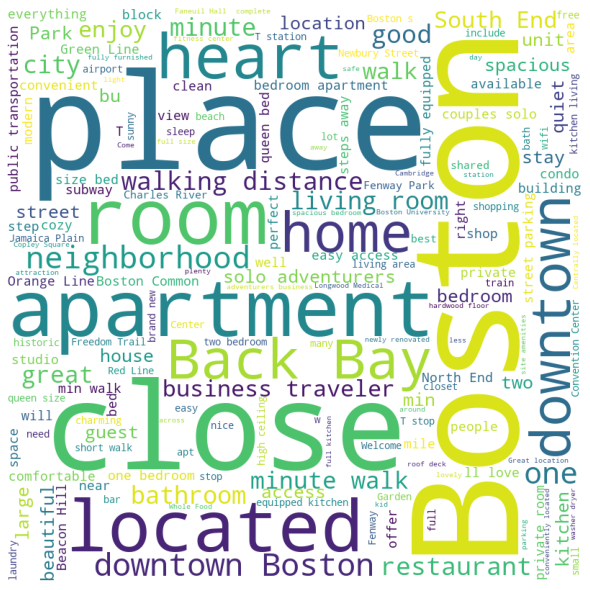

In [567]:
sns.set(color_codes=True)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(summary) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [568]:
from nltk.tokenize import word_tokenize
import pandas as pd

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eljaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [569]:
listings['tokens'] = listings['summary'].apply(word_tokenize)
listings['tokens'].head()

0    [Cozy, ,, sunny, ,, family, home, ., Master, b...
1    [Charming, and, quiet, room, in, a, second, fl...
2    [Come, stay, with, a, friendly, ,, middle-aged...
3    [Come, experience, the, comforts, of, home, aw...
4    [My, comfy, ,, clean, and, relaxing, home, is,...
Name: tokens, dtype: object

In [570]:
all_tokens = []
for i in range(listings.shape[0]):
    all_tokens = all_tokens + listings['tokens'][i]

In [571]:
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

FreqDist({',': 12509, '.': 9555, 'and': 6275, 'the': 5404, 'to': 4412, 'a': 3667, 'in': 3120, 'is': 2633, 'of': 2578, 'Boston': 2379, ...})

In [572]:
tokens1 = [word for word in all_tokens if word.isalnum()]

In [573]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eljaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [574]:
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [575]:
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

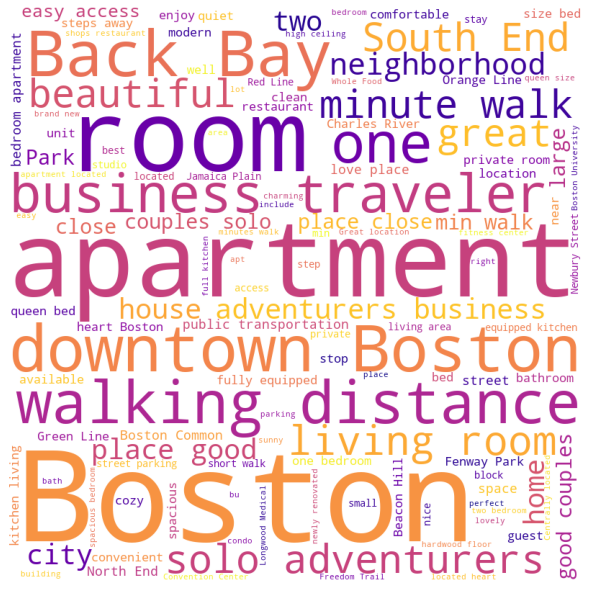

In [576]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [577]:
fdist1 = FreqDist(tokens2)
fdist1
counts = pd.Series(fdist1)
counts = counts[:20]
counts.sort_values(ascending=False, inplace=True)
counts

walk          994
bedroom       846
home          519
high          137
family        125
ceilings      124
sunny         113
charming       80
stores         78
garden         70
Cozy           58
Short          34
Master         13
village        11
play           10
Deck            6
attractive      2
hens            1
beehives        1
structure       1
dtype: int64

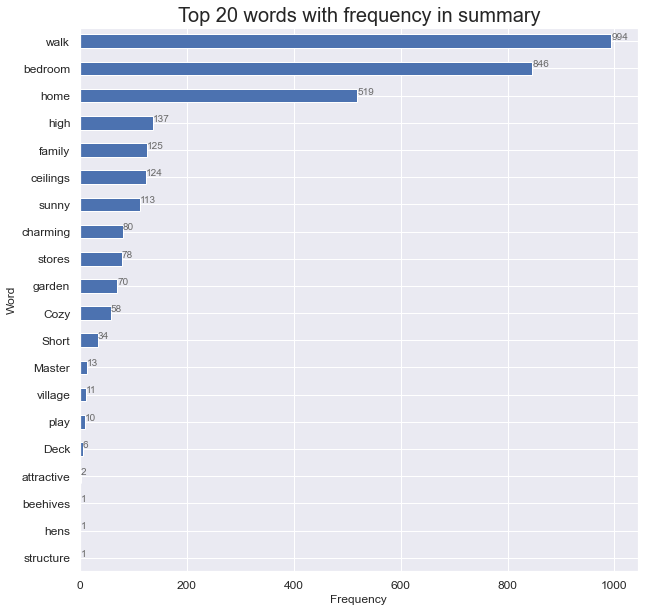

In [578]:
#Generates bar graph
ax = counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10), fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Frequency", fontsize=12)

#Y axis text
ax.set_ylabel("Word", fontsize=12)

#Title
ax.set_title("Top 20 words with frequency in summary", fontsize=20)

#Annotations
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

In [579]:
from textblob import TextBlob

In [580]:
TextBlob("Today is a great day").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [581]:
TextBlob("Today is not a great day").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [582]:
def generate_polarity(summary):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(summary).sentiment[0]

In [583]:
listings['polarity'] = listings['summary'].apply(generate_polarity)
listings['polarity'].head()

0    0.229375
1    0.203571
2    0.320238
3    0.238131
4    0.128175
Name: polarity, dtype: float64

In [584]:
def generate_subjectivity(summary):
    '''Extract subjectivity score (0 to +1) for each comment'''
    return TextBlob(summary).sentiment[1]

In [585]:
listings['subjectivity'] = listings['summary'].apply(generate_subjectivity)
listings['subjectivity'].head()

0    0.519583
1    0.388095
2    0.561905
3    0.444986
4    0.468254
Name: subjectivity, dtype: float64

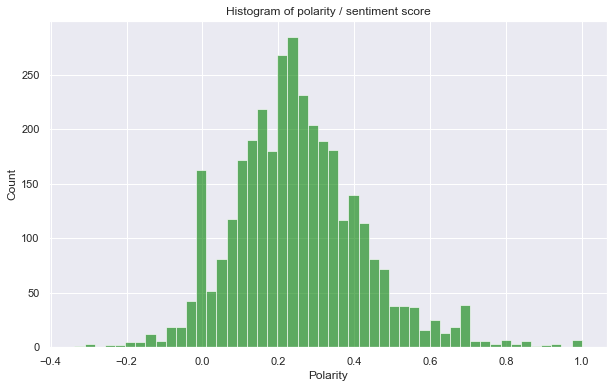

In [586]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(listings['polarity'], num_bins, facecolor='green', alpha=0.6)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity / sentiment score')
plt.show();

In [587]:
positive_sentiment = listings.nlargest(2000, 'polarity')
positive_sentiment = positive_sentiment[['summary', 'polarity','state','city', 'subjectivity']]
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '300px'})

In [588]:
positive_sentiment.state.value_counts()

MA    2000
Name: state, dtype: int64

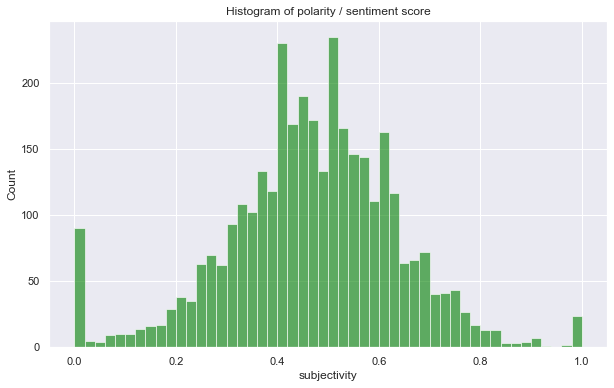

In [589]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(listings['subjectivity'], num_bins, facecolor='green', alpha=0.6)
plt.xlabel('subjectivity')
plt.ylabel('Count')
plt.title('Histogram of polarity / sentiment score')
plt.show();

In [590]:
positive_sentiment['summary']

148     This is an excellent 132 square foot room! It'...
156     Within close walking distance to the subway, r...
1178    This south-end apartment is located 1 block aw...
1727                    Beacon Hill with a Beautiful Cat!
2481    "Perfect home away from home and close to ever...
                              ...                        
1224    Hello! Modern Room in the heart of Boston with...
1724    No Marathon rentals yet. Sunny corner 1 bed fa...
2716    We are conveniently located within miles of Fr...
3174    Convenient 15 min bus Harvard, MIT, 30 min Lon...
3296    Lovely, sunny, private 1BR available in massiv...
Name: summary, Length: 2000, dtype: object

In [591]:
negative_sentiment = listings.nsmallest(2000, 'polarity')
negative_sentiment = negative_sentiment[['summary', 'city','state','name','notes','polarity']]
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '300px'})

In [592]:
negative_sentiment.city.value_counts()

Boston                       1896
Dorchester                     12
Somerville                     12
Cambridge                      11
Roxbury Crossing               11
Brookline                       9
Brighton                        7
Charlestown                     7
Jamaica Plain                   6
Allston                         6
West Roxbury                    3
Roslindale                      3
East Boston                     2
Milton                          1
Jamaica plain                   1
Jamaica Plain, MA               1
ALLSTON                         1
Roslindale, Boston              1
Hyde Park                       1
波士顿                             1
ROXBURY CROSSING                1
Mission Hill, Boston            1
Brighton                        1
Jamaica Plain, Boston           1
Jamaica Plain (Boston)          1
Boston, Massachusetts, US       1
dorchester, boston              1
Name: city, dtype: int64

In [593]:
negative_sentiment[['summary' ,'notes']]

summary  \
1970  6th floor overlooking the Boston Common and th...   
1364  One bedroom apartment on Beacon St. Walking di...   
1998  This Sunny Theater District apartment features...   
2470  Furnished 1 BR, 1 Bath (approx. 585 sq. feet) ...   
418   The apartment is a minute away from subway and...   
...                                                 ...   
29    My place is good for couples, solo adventurers...   
1568  My place is close to Little Asia, Orient Heigh...   
168   Quiet, peaceful room with pvt bath on your own...   
1630  Feel at home in this recently renovated 1 br /...   
3193  The Apartment is very clean, nicely decorated ...   

                                                  notes  
1970  Great location!  The Red Park Street Train sto...  
1364                                                NaN  
1998                                                NaN  
2470                                                NaN  
418                                                 NaN  
...                                                 ...  
29                                                  NaN  
1568  Laundry is available near the apartment. The m...  
168   While you don't need a car if you stay with us...  
1630                                                NaN  
3193                                                NaN  

[2000 rows x 2 columns]

In [594]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [595]:
def generate_named_entities(comment):
    '''Return the text snippet and its corresponding enrity label in a list'''
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [596]:
listings['named_entities'] = listings['summary'].apply(generate_named_entities)
listings.head()

index last_scraped                                           name  \
0      0   2016-09-07                     Sunny Bungalow in the City   
1      1   2016-09-07              Charming room in pet friendly apt   
2      2   2016-09-07               Mexican Folk Art Haven in Boston   
3      3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  ... instant_bookable  \
0  The bus stop is 2 blocks away, and frequent. B...  ...                f   
1  Plenty of safe street parking. Bus stops a few...  ...                t   
2  PUBLIC TRANSPORTATION: From the house, quick p...  ...                f   
3  There are buses that stop right in front of th...  ...                f   
4  From Logan Airport  and South Station you have...  ...                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

  reviews_per_month                                             tokens  \
0               NaN  [Cozy, ,, sunny, ,, family, home, ., Master, b...   
1              1.30  [Charming, and, quiet, room, in, a, second, fl...   
2              0.47  [Come, stay, with, a, friendly, ,, middle-aged...   
3              1.00  [Come, experience, the, comforts, of, home, aw...   
4              2.25  [My, comfy, ,, clean, and, relaxing, home, is,...   

   polarity subjectivity                                     named_entities  
0  0.229375     0.519583   

In [597]:
from spacy import displacy

In [598]:
for i in range(10,40):
    if listings['named_entities'][i]:
        displacy.render(nlp(listings['summary'][i]), style='ent', jupyter=True)

# 3-prediction of price according to different parameter 

In [599]:
listings_final = listings[(listings['price'] > 20) & (listings['price'] < 500)]
listings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3350 entries, 0 to 3441
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             3350 non-null   int64         
 1   last_scraped                      3350 non-null   datetime64[ns]
 2   name                              3350 non-null   object        
 3   summary                           3350 non-null   object        
 4   space                             2321 non-null   object        
 5   description                       3350 non-null   object        
 6   experiences_offered               3350 non-null   object        
 7   neighborhood_overview             2079 non-null   object        
 8   notes                             1551 non-null   object        
 9   transit                           2203 non-null   object        
 10  access                            2015 non-null 

In [600]:
# select numeric cols
num_cols = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
             'cleaning_fee', 'guests_included', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

numeric = listings_final.select_dtypes(include=['int64', 'float64'])[num_cols]
print(numeric.info())

# transform categorical columns into numeric and prepare new data frame
cat_cols = ['host_response_time', 'host_is_superhost', 'room_type', 'bed_type',
             'cancellation_policy', 'property_type', 'host_identity_verified', 'instant_bookable',
            'host_has_profile_pic', 'require_guest_profile_picture', 'require_guest_phone_verification']

numeric[cat_cols] = listings_final[cat_cols]

num_copy = numeric.copy()

num_copy = num_copy.replace({ "host_is_superhost": {"t": 1, "f": 2}, "instant_bookable": {"t": 1, "f": 2}, 
                                "host_identity_verified": {"t": 1, "f": 2}, "require_guest_profile_picture": {"t": 1, "f": 2},
                                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}, "host_has_profile_pic": {"t": 1, "f": 2},
                               "bed_type": {"Real Bed": 1, "Futon": 2, "Airbed": 3, "Pull-out Sofa": 4, "Couch": 5},
                               "require_guest_phone_verification": {"t": 1, "f": 2},
                               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}})

dummies = pd.get_dummies(num_copy)
print(dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3350 entries, 0 to 3441
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3350 non-null   float64
 1   latitude                        3350 non-null   float64
 2   longitude                       3350 non-null   float64
 3   accommodates                    3350 non-null   int64  
 4   bedrooms                        3348 non-null   float64
 5   bathrooms                       3345 non-null   float64
 6   beds                            3342 non-null   float64
 7   cleaning_fee                    2329 non-null   float64
 8   guests_included                 3350 non-null   int64  
 9   availability_30                 3350 non-null   int64  
 10  availability_60                 3350 non-null   int64  
 11  availability_90                 3350 non-null   int64  
 12  availability_365                33

## 3.1 linear Regression  

In [601]:
for col in dummies:
    dummies[col].fillna((dummies[col].mean()), inplace=True)

In [602]:
y = dummies['price'].astype(float)

In [603]:
X = dummies.drop('price',  axis =1 )

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [605]:
lm_model =  LinearRegression()
lm_model.fit(X_train , y_train )
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [606]:
#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

In [607]:
print (r2_scores_test , r2_scores_train )

0.5886105866343003 0.5967662049596525


C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



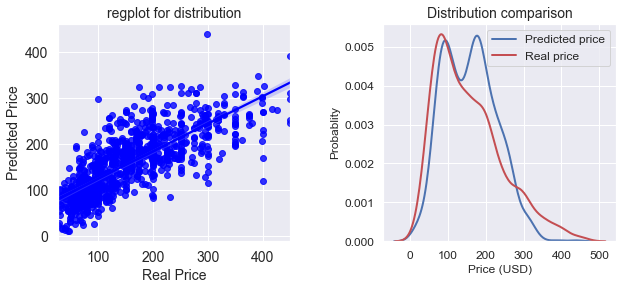

In [608]:
fig = plt.figure(figsize =(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('regplot for distribution', fontsize=14)
sns.regplot(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

In [609]:
feature_importance = pd.DataFrame(
    {'features': X.columns, 'coefficients': lm_model.coef_}
).sort_values(by='coefficients')
feature_importance['features'] = feature_importance['features']

import plotly.express as px
fig = px.bar(x='features', y='coefficients',
             data_frame=feature_importance, height=60)
fig.show();

In [610]:
from sklearn.ensemble import RandomForestRegressor
# Create instance of Random Forest Regressor and evaluate model
model_rf = RandomForestRegressor(n_estimators=76, random_state=42) 
model_rf.fit(X_train , y_train )
y_test_preds = model_rf.predict(X_test)
y_train_preds = model_rf.predict(X_train)
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)
print (r2_scores_test , r2_scores_train )

0.7001342745510983 0.9555994811354324


C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\eljaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



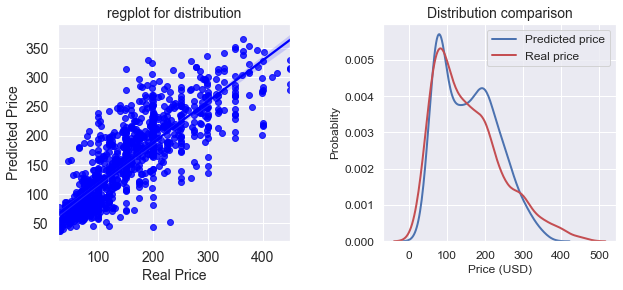

In [611]:
fig = plt.figure(figsize =(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('regplot for distribution', fontsize=14)
sns.regplot(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

## Final Outcomes 

used two model to predcit the price based on some numerical and Categorical Varibales ; these two model are <br>
1- linear Regression <br>
2- Random Forest Regressor <br>
and plots show thr result from Random Forest Regressor more accurate and able to get high score for both test and train set 